**Artificial Inteligence (CS550)**
<br>
Title: **Seminar №7**
<br>
Speaker: **Dr. Shota Tsiskaridze**

In [ ]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

<h2 align="center">Logistic Regression</h2>

<h3 align="center">Step 1: Data Gathering</h3>


- Lets assume that that our goal is to **determine whether candidates would get admitted to a prestigious university or not**.


- We have dataset containing **40 observations** where:
  - the independent variables are:
    - **GMAT** score: Graduate Management Admission Test, a scaled combination of your verbal and quantitative scaled scores. This test is used for admission to most MBA programs in the U.S. and Canada, as well as most English-language MBA programs in Europe.  
    - **GPA** score: Grade Point Average, a system of judging a student's performance and is followed throughout the United States.
    - Years of **work experience**.
  - the dependent variables represents whether a person gets admitted or not:
    - 1: Admitted
    - 0: Rejected


- This is how our dataset looks like:

<img src="images/S7_Dataset.png" width="500" alt="Example" />

<h3 align="center">Step 2: Importing the Required Packages</h3>

- Lets import required Python packeges:
  - **pandas** – used to create the DataFrame to capture the dataset in Python
  - **sklearn** – used to build the logistic regression model in Python
  - **seaborn** – used to create the Confusion Matrix
  - **matplotlib** – used to display charts

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

<h3 align="center">Step 3: Creating a Data Frame</h3>

In [16]:
import pandas as pd
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])
print (df)

    gmat  gpa  work_experience  admitted
0    780  4.0                3         1
1    750  3.9                4         1
2    690  3.3                3         0
3    710  3.7                5         1
4    680  3.9                4         0
5    730  3.7                6         1
6    690  2.3                1         0
7    720  3.3                4         1
8    740  3.3                5         1
9    690  1.7                1         0
10   610  2.7                3         0
11   690  3.7                5         1
12   710  3.7                6         1
13   680  3.3                4         0
14   770  3.3                3         1
15   610  3.0                1         0
16   580  2.7                4         0
17   650  3.7                6         1
18   540  2.7                2         0
19   590  2.3                3         0
20   620  3.3                2         1
21   600  2.0                1         0
22   550  2.3                4         0
23   550  2.7   

<h3 align="center">Step 4: Creating the Logistic Regression Method</h3>

- First, lets denote independent variables as $\mathbf{X}$ and the dependent variable as $\mathbf{y}$.

In [3]:
X = df[['gmat', 'gpa','work_experience']]
y = df['admitted']

- Then, we split our **data set** on **test set** and **training set**.

- We set the **test size** to $0.25$, therefore the **model testing** will be based on **$25\%$ of the dataset**, while the **model training** will be based on **$75\%$ of the dataset**.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

- Then, we apply the **logistic regression method**:

In [18]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

- Using the **seaborn package** to get the **Confusion Matrix**:

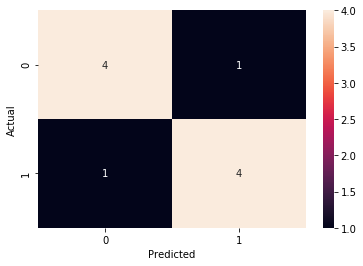

In [6]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)Finally, we apply the **logistic regression method**:

- As we can observe from the Confusion Matrix:
  - **TP** = True Positive = 4;
  - **TN** = True Negative = 4;
  - **FP** = False Positive = 1;
  - **FN** = False Negative = 1;
 

- In the final part, we print the **Accuracy** of the model:

  $$\mathbf{Accuracy} = \frac{\mathbf{TP + TN}}{\mathbf{Total}}$$

In [19]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.8


- Recall that our original dataset had 40 observations. Since we set the test size to $0.25$, then the confusion matrix displayed the results for **10 records**. 

- These are the 10 test records:

In [20]:
print (X_test) #test dataset
print (y_pred) #predicted values

    gmat  gpa  work_experience
22   550  2.3                4
20   620  3.3                2
25   670  3.3                6
4    680  3.9                4
10   610  2.7                3
15   610  3.0                1
28   650  3.7                6
11   690  3.7                5
18   540  2.7                2
29   660  3.3                5
[0 0 1 1 0 0 1 1 0 1]


In the actual dataset we see that for the test data, we got the correct results 8 out of 10 times:

<img src="images/S7_Accuracy.png" width="700" alt="Example" />

- This is matching with the **accuracy** level of $80\%$:



<h3 align="center">Step 4: Checking the Prediction for a New Data Set</h3>

- Let’s assume that we have a new data set with **5 new candidates**:

| gmat | gpa | work_experience |
|------|-----|-----------------|
| 590  | 2   | 3               |
| 740  | 3.7 | 4               |
| 680  | 3.3 | 6               |
| 610  | 2.3 | 1               |
| 710  | 3   | 5               |

- Our goal is to predict whether the **new candidates will get admitted or not**, using the **existing logistic regression model**.

- For this, lets create a second DataFrame called df2:

In [9]:
new_candidates = {'gmat': [590,740,680,610,710],
                  'gpa': [2,3.7,3.3,2.3,3],
                  'work_experience': [3,4,6,1,5]
                  }

df2 = pd.DataFrame(new_candidates,columns= ['gmat', 'gpa','work_experience'])<h3 align="center">Step 3: Creating a Data Frame</h3>

- And here is the complete code to get the prediction for the **5 new candidates**:

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])


X = df[['gmat', 'gpa','work_experience']]
y = df['admitted']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)  #in this case, you may choose to set the test_size=0. You should get the same prediction here

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)



new_candidates = {'gmat': [590,740,680,610,710],
                  'gpa': [2,3.7,3.3,2.3,3],
                  'work_experience': [3,4,6,1,5]
                  }

df2 = pd.DataFrame(new_candidates,columns= ['gmat', 'gpa','work_experience'])
y_pred=logistic_regression.predict(df2)

print (df2)
print (y_pred)

   gmat  gpa  work_experience
0   590  2.0                3
1   740  3.7                4
2   680  3.3                6
3   610  2.3                1
4   710  3.0                5
[0 1 1 0 1]


Therefore, tt is expected that the **first and fourth candidates will not be admitted**, while **other candidates will be admitted**.

<h1 align="center">End of Seminar</h1>